# Importing Libraries, viewing Dataframe

In [119]:
!pip install window

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Operation not permitted
The folder you are executing pip from can no longer be found.


In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

import shutil
from keras import models
from keras import layers
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score
np.random.seed(123)
from keras.models import load_model

Navigating to the correct folder and extracting images, converting them to numpy arrays

In [118]:
train_data_dir = 'Data/chest_xray/chest_xray/train'
val_data_dir = 'Data/chest_xray/chest_xray/val'
test_data_dir = 'Data/chest_xray/chest_xray/test'


test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, batch_size=235+391)

val_generator = ImageDataGenerator().flow_from_directory(
        val_data_dir, batch_size=18)


train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir,batch_size=1342+3876)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-118-e53a4b0623b0>", line 7, in <module>
    test_data_dir, batch_size=235+391)
  File "/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/keras/preprocessing/image.py", line 467, in flow_from_directory
    interpolation=interpolation
  File "/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/keras/preprocessing/image.py", line 150, in __init__
    dtype=dtype)
  File "/Users/mendeloster/opt/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/directory_iterator.py", line 115, in __init__
    for subdir in sorted(os.listdir(directory)):
FileNotFoundError: [Errno 2] No such file or directory: 'Data/chest_xray/chest_xray/test'

During handling of the above exception, another exception occurred:

Traceback (most recent call 

FileNotFoundError: [Errno 2] No such file or directory: 'Data/chest_xray/chest_xray/test'

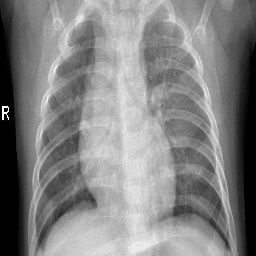

In [41]:
array_to_img(train_images[0])

In [42]:
train_labels[0]

array([0., 1.], dtype=float32)

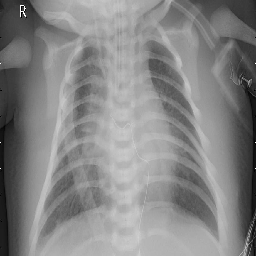

In [64]:
array_to_img(train_images[1342])

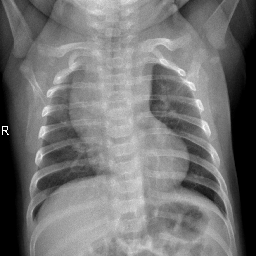

In [88]:
array_to_img(train_images[4545])

In [100]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [101]:
sum(train_labels[:,1])

3875.0

In [96]:
print('train size',train_images.shape)
print('test size ',test_images.shape)

train size (5216, 256, 256, 3)
test size  (624, 256, 256, 3)


In [97]:
train_images_unrow = train_images.reshape(5216,-1).T
test_images_unrow = test_images.reshape(624,-1).T

In [99]:
print(train_images_unrow.shape)
print(test_images_unrow.shape)

(196608, 5216)
(196608, 624)


In [103]:
train_labels_final = train_labels[:,1]
test_labels_final = test_labels[:,1]

Standardizing

In [106]:
train_images_final = train_images_unrow/255
test_images_final = test_images_unrow/255